<a href="https://colab.research.google.com/github/maeliech/database/blob/main/MIDTERM_CHANPENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAN PENG Maelie | Midterm

## Creating the SQL script

I started by reading the midterm assignment notice and writing down all the informations. Then, I made a sketch and drew arrows symbolizing the relations. Once I understood the subject, I started using the Moon Modeler software.

I followed the same process as we did during our lab session in class to create my tables. Here is a screenshot of it: 

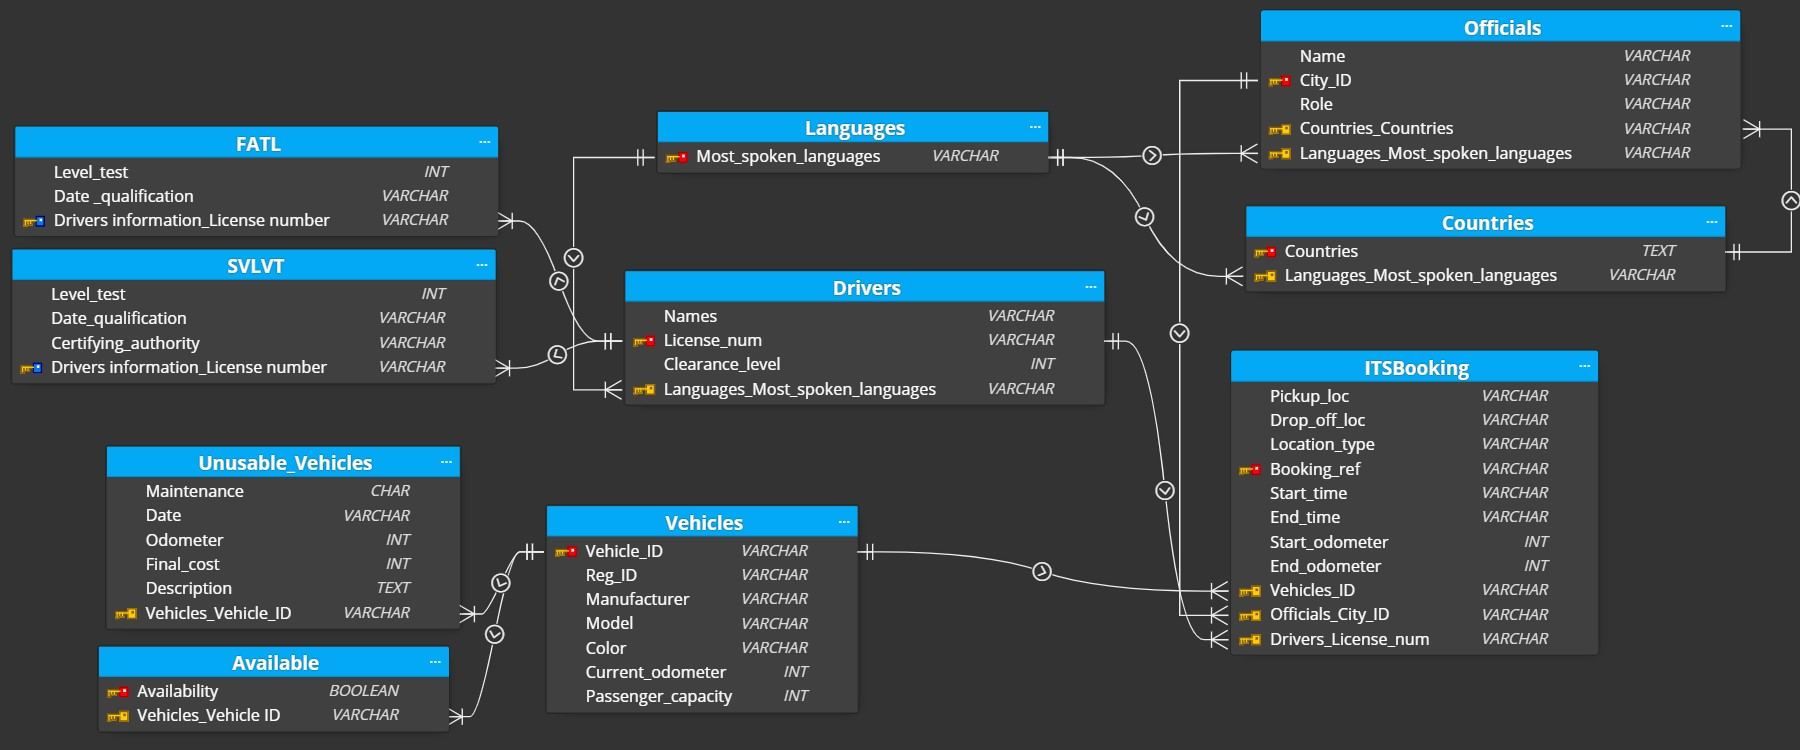

After making the model, I downloaded the SQL script and started using colab to create my tables.

## Creating the tables

I created a db file.

In [1]:
from sqlalchemy import create_engine
my_conn = create_engine('sqlite:////content/midterm_chanpeng.db') 

Then we create the different tables composing it, using the script we generated earlier and the commands seen in class.

In [2]:
r_set=my_conn.execute('''
CREATE TABLE `Unusable_Vehicles`(
  `Maintenance` CHAR(1),
  `Date` VARCHAR,
  `Odometer` INT,
  `Final_cost` INT,
  `Description` TEXT,
  `Vehicles_Vehicle_ID` VARCHAR,
  PRIMARY KEY(`Vehicles_Vehicle_ID`)
  FOREIGN KEY (`Vehicles_Vehicle_ID`) 
  REFERENCES `Vehicles` (`Vehicle_ID`),
  CONSTRAINT CHK_Maintenance CHECK (Maintenance='R' OR Maintenance='M')
);
 ''')

**Unusuable vehicles**: A vehicle is identified by its ID. To retrieve information regarding whether or not it is in maintenance we must look for the vehicle ID. We add one constrainte, there are only two state of maintenance, we use the command CONSTRAINT to precise it.

And then we fill the tables with a small sample of data using the commands seen in class:

In [3]:
my_conn.execute('''INSERT OR REPLACE INTO 'Unusable_Vehicles'
('Maintenance', 'Date', 'Odometer', 'Final_Cost', 'Description','Vehicles_Vehicle_ID') VALUES
('R', '05/10/22', 14563, 600, 'Changed wheels','1021ABC'),
('M', '05/21/22', 14563, 50, 'Monthly check','1018ETG'),
('R', '06/05/22', 14563, 250, 'Replacing seatbelts','1045AGH'),
('M', '06/29/22', 14563, 120, 'Checking oil','1421AFC');''')

In [4]:
r_set=my_conn.execute('''SELECT * from 'Unusable_Vehicles' ''');
for row in r_set:
  print(row)

('R', '05/10/22', 14563, 600, 'Changed wheels', '1021ABC')
('M', '05/21/22', 14563, 50, 'Monthly check', '1018ETG')
('R', '06/05/22', 14563, 250, 'Replacing seatbelts', '1045AGH')
('M', '06/29/22', 14563, 120, 'Checking oil', '1421AFC')


And we do the same for all the tables:

In [5]:
r_set=my_conn.execute('''
CREATE TABLE `Languages`
  (`Most_spoken_languages` VARCHAR, PRIMARY KEY(`Most_spoken_languages`));
 ''')

**Languages**: I created a separate languages table so both officials and drivers can have their own languages.

In [6]:
my_conn.execute('''INSERT OR REPLACE INTO 'Languages'
('Most_spoken_languages') VALUES
('KR'),
('ENG'),
('CN'),
('TH');''')

In [7]:
r_set=my_conn.execute('''SELECT * from 'Languages' ''');
for row in r_set:
  print(row)

('KR',)
('ENG',)
('CN',)
('TH',)


In [8]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS `Countries`(`Countries` TEXT, 
`Languages_Most_spoken_languages` VARCHAR, 
PRIMARY KEY(`Countries`)
FOREIGN KEY (`Languages_Most_spoken_languages`)
REFERENCES `Languages` (`Most_spoken_languages`)
);
 ''')

**Countries**: Using the languages table, I can add more than one language per country.

In [10]:
my_conn.execute('''INSERT OR REPLACE INTO 'Countries'
('Countries','Languages_Most_spoken_languages') VALUES
('Korea','KR, JP, ENG'),
('Japan','JP, KR, CH'),
('China','CH, ENG'),
('Thailand','TH, ENG') ;''')

In [11]:
r_set=my_conn.execute('''SELECT * from 'Countries' ''');
for row in r_set:
  print(row)

('Korea', 'KR, JP, ENG')
('Japan', 'JP, KR, CH')
('China', 'CH, ENG')
('Thailand', 'TH, ENG')


In [12]:
r_set=my_conn.execute('''
CREATE TABLE `Available`(
`Availability` BOOLEAN, `Vehicles_Vehicle_ID` VARCHAR,
  PRIMARY KEY(`Availability`)
  FOREIGN KEY (`Vehicles_Vehicle_ID`) 
  REFERENCES `Vehicles` (`Vehicle_ID`)
);

 ''')

**Availability**: A vehicle is defined by available or not by a boolean, 1 or 0. Each vehicle being identified by its ID, there's a link between the two.

In [13]:
my_conn.execute('''INSERT OR REPLACE INTO 'Available'
('Availability','Vehicles_Vehicle_ID') VALUES
(1,'V1000'),
(1,'V1001'),
(0,'V1002'),
(1,'V1003'); ''')

In [14]:
r_set=my_conn.execute('''SELECT * from 'Available' ''');
for row in r_set:
  print(row)

(0, 'V1002')
(1, 'V1003')


In [15]:
r_set=my_conn.execute('''
CREATE TABLE `ITSBooking`(
  `Pickup_loc` VARCHAR,
  `Drop_off_loc` VARCHAR,
  `Location_type` VARCHAR,
  `Booking_ref` VARCHAR,
  `Start_time` VARCHAR,
  `End_time` VARCHAR,
  `Start_odometer` INT,
  `End_odometer` INT,
  `Drivers_License_num` VARCHAR,
  `Vehicles_ID` VARCHAR,
  `Officials_City_ID` VARCHAR,
  PRIMARY KEY(`Booking_ref`)
  FOREIGN KEY (`Officials_City_ID`) 
  REFERENCES `Officials` (`City_ID`)
  FOREIGN KEY (`Drivers_License_num`)
  REFERENCES `Drivers` (`License_num`)
  FOREIGN KEY (`Vehicles_ID`) REFERENCES `Vehicles` (`Vehicle_ID`)
  CONSTRAINT CHK_odo CHECK (Start_odometer < End_odometer)
);


 ''')

**Service management**: From the text, we get many criterias. I entered each of them in the table. Because this table is the heart of the system is it bigger and contains more relationships than the other ones.
I decided to use Varchar for the time so we could have it under the 00:00 format. Same for the booking reference number it contains letters. I added a constraint regarding the odometer, it must at the end by bigger than the starting odometer.


In [16]:
my_conn.execute('''INSERT OR REPLACE INTO 'ITSBooking'
('Pickup_loc','Drop_off_loc', 'Location_type', 'Booking_ref','Start_time', 'End_time','Start_odometer','End_odometer','Drivers_License_num','Vehicles_ID','Officials_City_ID') VALUES
('Airport','23rd street','Hotel','REF3495','18:40','19:00','400','480','V1000','1021ABC','Kim Soojin'),
('Stadium','14th street','Hotel','REF9843','09:10','09:44','1200','1240','V1001','1018ETG','Sato Yuki'),
('Hotel','7th avenue','Airport','REF3796','12:00','12:56','5999','6060','V1002','1045AGH','Wang Praew'),
('Aquatic center','27th boulevard','Hotel','REF3355','15:45','16:24','4567','4594','V1003','1421AFC','Zhang Yu'); ''')

In [17]:
r_set=my_conn.execute('''SELECT * from 'ITSBooking' ''');
for row in r_set:
  print(row)

('Airport', '23rd street', 'Hotel', 'REF3495', '18:40', '19:00', 400, 480, 'V1000', '1021ABC', 'Kim Soojin')
('Stadium', '14th street', 'Hotel', 'REF9843', '09:10', '09:44', 1200, 1240, 'V1001', '1018ETG', 'Sato Yuki')
('Hotel', '7th avenue', 'Airport', 'REF3796', '12:00', '12:56', 5999, 6060, 'V1002', '1045AGH', 'Wang Praew')
('Aquatic center', '27th boulevard', 'Hotel', 'REF3355', '15:45', '16:24', 4567, 4594, 'V1003', '1421AFC', 'Zhang Yu')


In [18]:
r_set=my_conn.execute('''
CREATE TABLE `Officials`(
  `Name` VARCHAR,
  `City_ID` VARCHAR,
  `Role` VARCHAR,
  `Countries_Countries` VARCHAR,
  `Languages_Most_spoken_languages` VARCHAR,
  PRIMARY KEY(`City_ID`)
  FOREIGN KEY (`Languages_Most_spoken_languages`)
  REFERENCES `Languages` (`Most_spoken_languages`)
  FOREIGN KEY (`Countries_Countries`) 
  REFERENCES `Countries` (`Countries`)

);
''')

**Officials**: Each official is identified by its city. And each official may speak more than one languages and is coming from a country, with these criterias, I linked this table to the countries and languages one.

In [19]:
my_conn.execute('''INSERT OR REPLACE INTO 'Officials'
('Name','City_ID','Role','Countries_Countries','Languages_Most_spoken_languages') VALUES
('Kim Soojin','Seoul','Judge','Korea','KR,ENG'),
('Sato Yuki','Tokyo','Coach','Japan','JP,ENG'),
('Wang Praew','Bangkok','Physician','Thailand','ENG, TH'),
('Zhang Yu','Beijing','Physician','China', 'CN, KR'); ''')

In [20]:
r_set=my_conn.execute('''SELECT * from 'Officials' ''');
for row in r_set:
  print(row)

('Kim Soojin', 'Seoul', 'Judge', 'Korea', 'KR,ENG')
('Sato Yuki', 'Tokyo', 'Coach', 'Japan', 'JP,ENG')
('Wang Praew', 'Bangkok', 'Physician', 'Thailand', 'ENG, TH')
('Zhang Yu', 'Beijing', 'Physician', 'China', 'CN, KR')


In [21]:
r_set=my_conn.execute('''
CREATE TABLE `Drivers`(
  `Names` VARCHAR,
  `License_num` VARCHAR,
  `Clearance_level` INT,
  `Languages_Most_spoken_languages` VARCHAR,
  PRIMARY KEY(`License_num`)
  FOREIGN KEY (`Languages_Most_spoken_languages`)
  REFERENCES `Languages` (`Most_spoken_languages`)
);

 ''')

**Drivers**: Here, I decided to identify the drivers by their License number, as it is personal. Identifying them by their names would have been confusing since the officials also have a name. They may speak one or more languages and I assumed that they were all Koreans since they are working in Korea.

In [22]:
my_conn.execute('''INSERT OR REPLACE INTO 'Drivers'
('Names','License_num','Clearance_level','Languages_Most_spoken_languages') VALUES
('Park Seokmin','V1001',0,'KR,ENG'),
('Lee Youngjae','V1002',1,'KR,JP'),
('Jeong Heewon','V1003',0,'KR,CN,TH'); ''')

In [23]:
r_set=my_conn.execute('''SELECT * from 'Drivers' ''');
for row in r_set:
  print(row)

('Park Seokmin', 'V1001', 0, 'KR,ENG')
('Lee Youngjae', 'V1002', 1, 'KR,JP')
('Jeong Heewon', 'V1003', 0, 'KR,CN,TH')


We add the constraint for the level of the test.

In [24]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS `SVLVT`(
  `Level_test` INT,
  `Date_qualification` VARCHAR,
  `Certifying_authority` VARCHAR,
  `Drivers_License_num` VARCHAR,
  PRIMARY KEY(`Drivers_License_num`)
  FOREIGN KEY (`Drivers_License_num`)
  REFERENCES `Drivers` (`License_num`)
  CONSTRAINT CHK_level CHECK ((Level_test > 0) AND(Level_test < 5))

);

 ''')

**SVLVT**: I created a different table for the tests because not every drivers passed the test. I decided to identify it by the driver license num, that way, all the information regarding the driver can be found using its license number.

In [25]:
my_conn.execute('''INSERT OR REPLACE INTO 'SVLVT'
('Level_test','Date_qualification','Certifying_authority','Drivers_License_num') VALUES
(3,'02/19/2006','Police','V1001'),
(3,'12/25/2014','Police','V1002'),
(4,'01/09/2002','Police','V1003'); ''')

In [26]:
r_set=my_conn.execute('''SELECT * from 'SVLVT' ''');
for row in r_set:
  print(row)

(3, '02/19/2006', 'Police', 'V1001')
(3, '12/25/2014', 'Police', 'V1002')
(4, '01/09/2002', 'Police', 'V1003')


In [27]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS `FATL`(
`Level_test` INT, 
`Date_qualification` VARCHAR,
  `Drivers_License_num` VARCHAR,
  PRIMARY KEY(`Drivers_License_num`)
  FOREIGN KEY (`Drivers_License_num`)
  REFERENCES `Drivers` (`License_num`)
  CONSTRAINT CHK_level CHECK ((Level_test > 0) AND(Level_test < 10))
);

 ''')

**FATL**: I created another table for this test as well. A driver may have passed one or the two tests. By having two tables, we can keep a record of it. 

In [28]:
my_conn.execute('''INSERT OR REPLACE INTO 'FATL'
('Level_test','Date_qualification','Drivers_License_num') VALUES
(8,'12/11/2011','V1001'),
(6,'04/23/2016','V1002'),
(4,'01/01/2003','V1003'); ''')

In [29]:
r_set=my_conn.execute('''SELECT * from 'FATL' ''');
for row in r_set:
  print(row)

(8, '12/11/2011', 'V1001')
(6, '04/23/2016', 'V1002')
(4, '01/01/2003', 'V1003')


In [30]:
r_set=my_conn.execute('''
CREATE TABLE `Vehicles`(
  `Vehicle_ID` VARCHAR,
  `Reg_ID` VARCHAR,
  `Manufacturer` VARCHAR,
  `Model` VARCHAR,
  `Color` VARCHAR,
  `Current_odometer` INT,
  `Passenger_capacity` INT,
  PRIMARY KEY(`Vehicle_ID`)
);

 ''')

**Vehicles**: A vehicle has different attributes as shown here. It is identified by the ID as the registration ID may change overtime.

In [31]:
my_conn.execute('''INSERT OR REPLACE INTO 'Vehicles'
('Vehicle_ID','Reg_ID','Manufacturer','Model','Color','Current_odometer','Passenger_capacity') VALUES
('V1000','1021ABC','KIA','Model1','Black',400,4),
('V1001','1018ETG','VOLVO','Model3','White',3000,4),
('V1002','1045AGH','KIA','Model4','Black',1230,4),
('V1003','1421AFC','BMW','Model2','Grey',1230,4); ''')

In [32]:
r_set=my_conn.execute('''SELECT * from 'Vehicles' ''');
for row in r_set:
  print(row)

('V1000', '1021ABC', 'KIA', 'Model1', 'Black', 400, 4)
('V1001', '1018ETG', 'VOLVO', 'Model3', 'White', 3000, 4)
('V1002', '1045AGH', 'KIA', 'Model4', 'Black', 1230, 4)
('V1003', '1421AFC', 'BMW', 'Model2', 'Grey', 1230, 4)


To conclude, I tried my best to represent and make links in the most efficient way for the ITS project. 